<a href="https://colab.research.google.com/github/aguilarmadeira/Optimization/blob/main/Exemplo2_NSGA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      100 |     12 |  0.000000E+00 |  0.2490015111 |             - |             -
     2 |      200 |     21 |  0.000000E+00 |  0.000000E+00 |  0.0476626438 |         ideal
     3 |      300 |     28 |  0.000000E+00 |  0.000000E+00 |  0.0212020048 |         ideal
     4 |      400 |     40 |  0.000000E+00 |  0.000000E+00 |  0.0879812693 |         nadir
     5 |      500 |     58 |  0.000000E+00 |  0.000000E+00 |  0.0198391231 |         nadir
     6 |      600 |     75 |  0.000000E+00 |  0.000000E+00 |  0.0093160173 |         ideal
     7 |      700 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0064879831 |         ideal
     8 |      800 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0147315123 |         nadir
     9 |      900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0025738919 |         ideal
    10 |     1000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0233307604 |         nadir

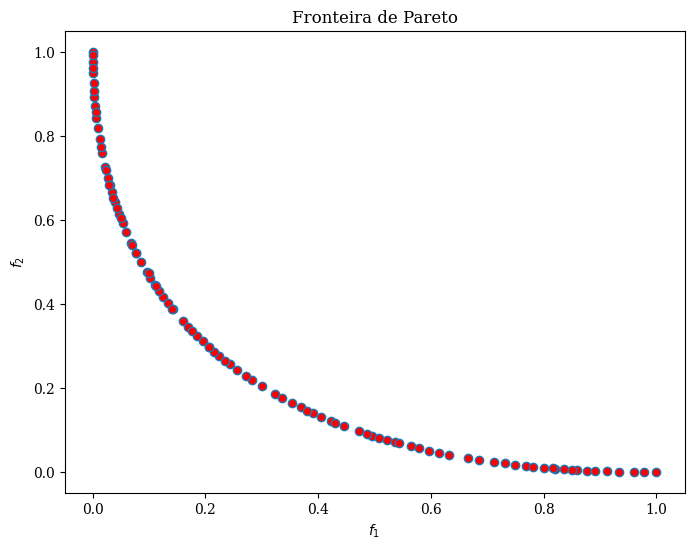

In [3]:
# Instalar pymoo se ainda não estiver instalado
!pip install pymoo

from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.core.problem import Problem
from pymoo.visualization.scatter import Scatter
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
import numpy as np

# Definir o problema multiobjetivo
class MyProblem(Problem):
    def __init__(self):
        super().__init__(
            n_var=2,  # Número de variáveis
            n_obj=2,  # Número de funções objetivo
            n_constr=2,  # Número de restrições
            xl=np.array([0, 0]),  # Limite inferior para as variáveis
            xu=np.array([1, 1])   # Limite superior para as variáveis
        )

    # Funções objetivo
    def _evaluate(self, x, out, *args, **kwargs):
        f1 = x[:, 0]**2 + x[:, 1]**2  # Primeira função objetivo
        f2 = (x[:, 0] - 1)**2 + x[:, 1]**2  # Segunda função objetivo

        # Restrições
        g1 = x[:, 0] + x[:, 1] - 1
        g2 = x[:, 0]**2 + x[:, 1]**2 - 1

        out["F"] = np.column_stack([f1, f2])  # Funções objetivo
        out["G"] = np.column_stack([g1, g2])  # Restrições

# Configuração do algoritmo NSGA-II
algorithm = NSGA2(
    pop_size=100,  # Tamanho da população
    sampling=FloatRandomSampling(),  # Amostragem inicial
    crossover=SBX(prob=0.9, eta=15),  # Tipo de cruzamento
    mutation=PM(prob=1/2, eta=20),  # Tipo de mutação com probabilidade corrigida
    eliminate_duplicates=True
)

# Resolver o problema
problem = MyProblem()
res = minimize(
    problem,
    algorithm,
    termination=('n_gen', 100),  # Número de gerações
    verbose=True
)

# Visualizar os resultados
print("Soluções na Fronteira de Pareto:")
print(res.F)

# Visualizar o gráfico da Fronteira de Pareto
plot = Scatter(title="Fronteira de Pareto")
plot.add(res.F, facecolor="red")
plot.show()
